In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def target_function(x1, x2):
    return (1.5 - x1 + x1*x2)**2 + \
            (2.25 - x1 + x1*(x2**2))**2 + \
            (2.625 - x1 + x1*(x2**3))**2

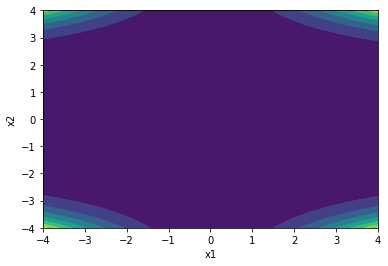

In [3]:
x1 = np.linspace(-4, 4, 200)
x2 = np.linspace(-4, 4, 200)
x1v, x2v = np.meshgrid(x1, x2)
z = target_function(x1v, x2v)
plt.contourf(x1v,x2v,z)
plt.xlabel('x1')
plt.ylabel('x2')

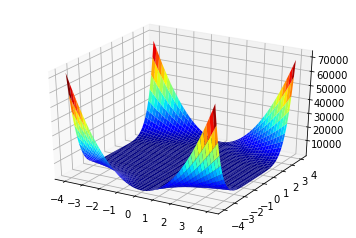

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot_surface(x1v,x2v,z, cmap=cm.jet)

In [5]:
def numerical_derivative(function, x1, x2, step):
    d1 = (function(x1 + step, x2) - function(x1, x2))/step
    d2 = (function(x1, x2 + step) - function(x1, x2))/step
    return d1, d2

def f1(x1, x2):
    return 2.5*(x1**2 -x2)**2 + (1 -x1)**2

In [85]:
def step_size(x1, x2, x1_old, x2_old, d1, d2, d1_old, d2_old):
    dg1 = d1 - d1_old
    dg2 = d2 - d2_old
    dx1 = x1 - x1_old
    dx2 = x2 - x2_old
    p1 = dx1*dg1 + dx2*dg2
    p2 = dg1**2 + dx2*dg2 + 0.01
    print(p1)
    return p1/p2

def step_size2(d1, d2, d1_old, d2_old):
    try:
        gx = d1 + (d1**2)/d1_old
        gy = d2 + (d2**2)/d2_old
    except:
        gx = d1
        gy = d2
    return gx, gy

def gradient_descent(function, x10, x20, alpha, error, N):
    x1 = x10
    x2 = x20
    x1_list = []
    x2_list = []
    d =[]
    i = 0
    step = 1e-6 
    
    d1, d2 = numerical_derivative(function, x1, x2, step)
    value = np.sqrt(d1**2 + d2**2)    

    x1_list.append(x1)
    x2_list.append(x2)
   
    d.append((d1, d2))
    verbose = 0
    decrease = 1
    while decrease > error or value > error:
        d1, d2 = numerical_derivative(function, x1, x2, step)
        if verbose:
            print("d1: {}, d2: {}".format(d1, d2))
            print("x1: {}, x2: {}".format(x1, x2))
            print("Value of function: {}".format(function(x1, x2)))
        if i > 1:
            d1_old = d[-1][0]
            d2_old = d[-1][1]
            gx, gy = step_size2(d1, d2, d1_old, d2_old)
            x1 = x1 - 4*alpha*gx
            x2 = x2 - 4*alpha*gy
            decrease = np.abs(function(x1, x2) - function(x[-1], x[-1]))
        else:
            x1 = x1 - alpha*d1
            x2 = x2 - alpha*d2
            
        x1_list.append(x1)
        x2_list.append(x2)
        d.append((d1, d2))
        value = np.sqrt(d1**2 + d2**2)  
        if verbose: print("Value : {}\n".format(value))
        if verbose: print("#######################")
        i += 1
        if i > N:
            break
    return x1, x2
#x1, x2 = gradient_descent(target_function, -2, -4, 0.00001, 0.001, 100000)
#print(x1, x2)

In [81]:
x1 = 12*np.random.random((100,1)) - 4
x2 = 12*np.random.random((100,1)) - 4
minima_x1 = []
minima_x2 = []
for x, y in zip(x1, x2):
    x1, x2 = gradient_descent(f1, x, y, 0.00001, 0.001, 100000)    
    
    minima_x1.append(x1)
    minima_x2.append(x2)

100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001


100
100


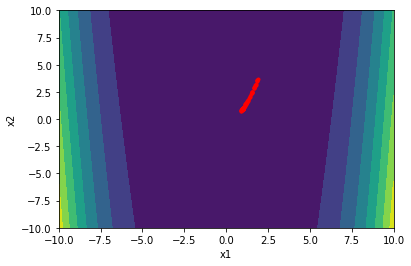

In [82]:
x1 = np.linspace(-10, 10, 200)
x2 = np.linspace(-10, 10, 200)
x1v, x2v = np.meshgrid(x1, x2)
z = f1(x1v, x2v)
print(len(minima_x1))
print(len(minima_x1))
#minima_x1 = [minimum for minimum in minima_x1 if minimum < 4 and minimum > -4]
#minima_x2 = [minimum for minimum in minima_x2 if minimum < 4 and minimum > -4]
plt.contourf(x1v,x2v,z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(minima_x1, minima_x2, 'r.')

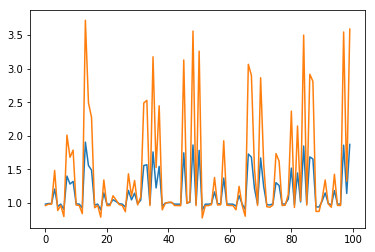

In [83]:
plt.figure()
plt.plot(minima_x1)
plt.plot(minima_x2)

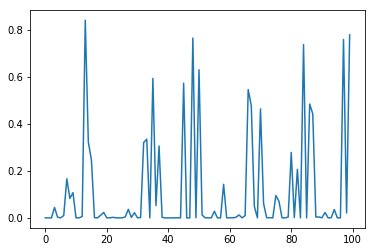

In [84]:
z= [f1(x, y) for x, y in zip(minima_x1, minima_x2)]
plt.plot(z)

In [89]:
x1 = 8*np.random.random((100,1)) - 4
x2 = 8*np.random.random((100,1)) - 4
minima_x1 = []
minima_x2 = []
for x, y in zip(x1, x2):
    x1, x2 = gradient_descent(target_function, x, y, 0.00001, 0.001, 100000)    
    
    minima_x1.append(x1)
    minima_x2.append(x2)

c:\users\jakub\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app
c:\users\jakub\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
c:\users\jakub\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
c:\users\jakub\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
c:\users\jakub\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:38: RuntimeWarning: invalid value encountered in greater
c:\users\jakub\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main

0.313553700989
95


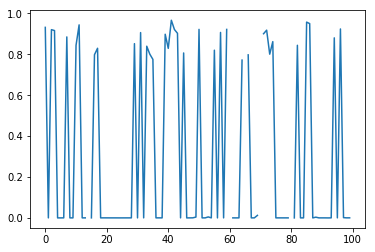

In [105]:
z= [target_function(x, y) for x, y in zip(minima_x1, minima_x2)]
plt.plot(z)

z = [x for x in z if not np.isnan(x)]
print(np.mean(z))
print(len(z))